# Sharpe Ratio

## Primer 

Sharpe Ratio is the most common metric used to measure risk in finance.

The formula is 

> (return on portfolio - risk free rate)/standard deviation of the excess return on the portfolio

There are tons of resources on the internet about sharpe ratio.

[This investopedia page](https://www.investopedia.com/terms/s/sharperatio.asp) is a good introduction.


We assume the risk free rate to be zero, then the formula simply becomes mean returns divided by the standard deviation of returns. 


In [1]:
import numpy as np
import pandas as pd
import empyrical as ep
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Single stock

Let us create a set of 5 stocks with same monthly returns but with different standard deviation for a period of 20 years. Stocks are named a to e with *a* being the stock with least volatility *e* with the highest volatility

,a,b,c,d,e
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.010000,0.010500,0.010000,0.008800,0.007300
std,0.004900,0.010200,0.019400,0.044800,0.098500
min,-0.003200,-0.014600,-0.042700,-0.106500,-0.264700
25%,0.006600,0.003400,-0.002800,-0.022400,-0.063300
50%,0.010400,0.010100,0.009500,0.009100,0.002000
75%,0.013100,0.017300,0.022600,0.039500,0.074300
max,0.023400,0.040400,0.079400,0.134300,0.339900
sharpe,2.029252,1.031875,0.513276,0.197086,0.074137
sharpe_annual,7.029536,3.574519,1.778041,0.682726,0.256819


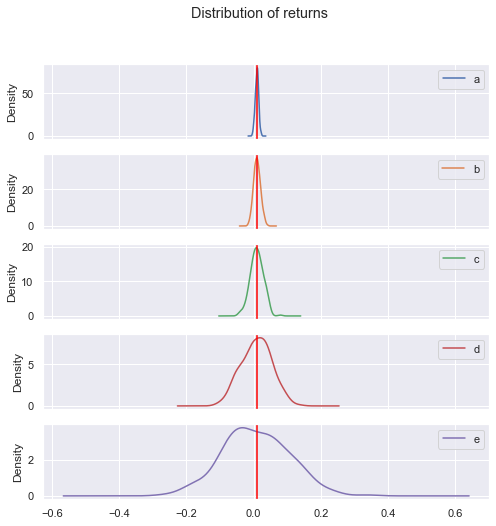

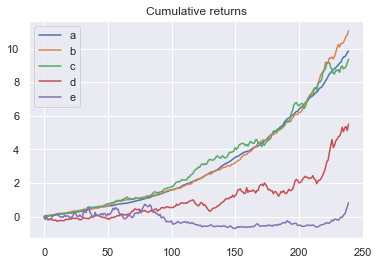

In [2]:
mu = 0.01 #monthly returns
# Express sigma in relation to mean
multipliers = (0.5,1,2,5,10)
collect = {}
for s,m in zip(list('abcde'), multipliers):
    collect[s] = np.random.normal(loc=mu, scale=m*mu, size=240)
df = pd.DataFrame(collect)
axes = df.plot(kind='kde', title='Distribution of returns', subplots=True, figsize=(8,8))
for ax in axes:
    ax.axvline(0.01, color='red')
ep.cum_returns(df).plot(title='Cumulative returns')
s = df.describe().round(4)
s = s.append(pd.Series(df.mean()/df.std(), name='sharpe'))
s = s.append(pd.Series((df.mean()/df.std())*np.sqrt(12), name='sharpe_annual'))
s


Although all values are generated from the normal distribution with a fixed mean of 0.01, we could see a stark difference.


The first plot shows the distribution or the spread of returns where **a and b** are close to the mean of 0.01 (the red line) while e is just nowhere. You can also look at the table where the minimum and maximum returns for a are much closer while for e they are much wider. This implies this is very difficult to infer the mean returns of e as they wildly swing from one extreme to other while on the other hand we could be fairly confident with our estimates for a. From a risk perspective, it is very difficult to differentiate the actual mean value of stock e due to its high volatility. A look at the sharpe ratio for the instruments also follow this pattern.

A look at the cumulative returns suggests that stock e has left everybody behind and despite wild swings, it is way above; it seems that volatility helps in the long run. But this is only a single simulation of how prices would behave for a given risk/return profile.

<!-- TEASER_END -->

## Multiple stocks

Let us now create a simulation of 1000 samples of 240 days for each of the stocks and see how they behave.

We assume 5 risk profiles in the market and draw 1000 samples from each of them, so 5000 instruments. We would like to see how well one would have fared had he invested in these instruments. Theroetically, we only have 5 different profiles but let us do the simulation

In [3]:
def draw_samples(mu=0.01,sigma=0.01,size=1000,n=240):
    samples = np.random.normal(loc=mu,scale=sigma,size=(size,n))
    return samples

mu = 0.01
multipliers = (0.5,1,2,5,10)
sharpe_ratios_dict = {}
returns_dict = {}
for s,m in zip(list('abcde'), multipliers):
    samples = draw_samples(mu=mu, sigma=m*mu)
    sharpe_ratios_dict[s] = (samples.mean(axis=1)/samples.std(axis=1))*np.sqrt(12)
    returns_dict[s] = (samples+1).prod(axis=1)
sharpe_ratios = pd.DataFrame(sharpe_ratios_dict)
returns = pd.DataFrame(returns_dict)

,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.967714,3.486953,1.720395,0.701139,0.347342
std,0.388638,0.269404,0.241078,0.224136,0.229707
min,5.895596,2.539873,1.085622,0.013065,-0.357694
25%,6.703311,3.296277,1.555953,0.546643,0.189775
50%,6.962238,3.472023,1.713981,0.696831,0.342244
75%,7.207982,3.669762,1.883917,0.846708,0.492320
max,8.344530,4.487707,2.659887,1.467446,1.111180


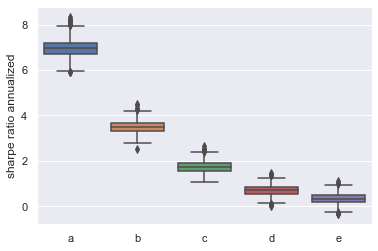

In [4]:
axes = sns.boxplot(data=sharpe_ratios)
axes.set_ylabel('sharpe ratio annualized')
sharpe_ratios.describe()

Returns table


,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.896863,10.933012,10.653770,10.903785,10.821143
std,0.857940,1.624779,3.449507,9.316623,25.780611
min,8.590849,6.487331,4.177566,0.769188,0.018077
25%,10.305349,9.731464,8.260418,4.854084,1.118406
50%,10.883962,10.760017,10.176355,8.129088,3.199901
75%,11.471836,12.031740,12.411460,13.602479,9.056051
max,13.911014,16.577768,29.737484,79.659031,397.597440


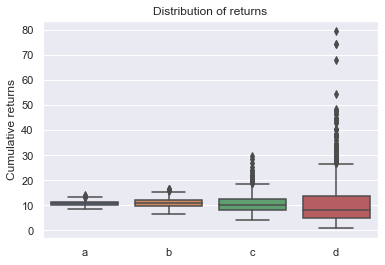

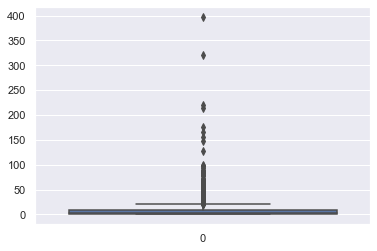

In [5]:
axes = sns.boxplot(data=returns.loc[:,'a':'d'])
axes.set_title('Distribution of returns')
axes.set_ylabel('Cumulative returns')
plt.figure()
axes2 = sns.boxplot(data=returns.e)
axes.set_ylabel('Cumulative returns')
print('Returns table')
returns.describe()

Though we only have 5 risk profiles and a fixed mean, there is a massive difference in the results.

The sharpe ratios for stock a and b are closely clustered. So if you have invested in any of the stocks falling into the risk profile a, you would end up more or less the same way the others have ended. The difference between the minimum and maximum returns would just be 2 times, volatility would not have played a big role and this risk profile have performed better in all times. The box plot shows the sharpe ratio decreasing with an increase in volatility.

On the other end of the spectrum, the maximum and minimum returns in profile e is just crazy. You could have even ended up in a loss or could have become a millionare. 

Despite the same returns, risk does some crazy things.

## Probability of returns

The monthly return in our example is 1%. So, if you have invested for 20 years, your return should be 

`1.01**240 = ~10.9`

From the returns table, you could straight away infer that for profiles a,b,c the mean and median or more or less close to this value. Let us calculate the number of portfolios that beat this benchmark in all of the risk profiles.

Also, half of the returns is `1.005**240 = ~3.3`

Let us also calculate the number of portfolios that beat this benchmark too

In [6]:
def calculate_probability(returns, v):
    """
    Given an array of returns and a value v, return the number of
    times returns exceed v 
    """
    length = len(returns)
    positive = (returns>v).sum()
    return positive

full_returns = [calculate_probability(returns[col],1.01**240) for col in returns]
half_returns = [calculate_probability(returns[col],1.005**240) for col in returns]
prob = pd.DataFrame({'full_returns': full_returns, 'half_returns': half_returns},
                   index=list('abcde'))
prob

,full_returns,half_returns
a,491,1000
b,472,1000
c,404,1000
d,347,885
e,217,496


Profiles a,b,c got 1000 out of 1000 in gaining half the monthly returns while profile e can't even fulfil 50% returns. Thus, if 1000 people has got their investments in profile c, even half of them would not have got 3 times the money; they would have even fared worse.

Thus, an increase in volatility becomes more of luck and less of skill. Looking at only the returns in deciding on a portfolio is fraught with too much risk and may just turn out to be a lucky affair which may not work out for all the people.

## Sharpe multipliers

When I generated the samples, I used a fixed monthly mean of 1% but for deviation, multipliers are used. The mean is multiplied by the deviation to get the numbers.

```python
multipliers = (0.5,1,2,5,10)
```

These multipliers are just inverse for the original formula `standard_deviation/mean`, something similar to the P/E ratio. The higher this number, then the portfolio is risky, the lower this number the better. These are not annualized and hence they could not be compared on a similar scale. Below are the tables for the multipliers and their annualized sharpe ratios.

Thus if you portfolio has a mean of 0.2% and a deviation of 0.6% on a weekly basis, then your sharpe multiple is **0.6/0.2 = 3** and since it is on a weekly basis, the annualized sharpe ratio is **(0.2/0.6) x sqrt(52) = ~2.4**

In [7]:
multipliers = np.arange(1,11)
periods = np.array([252,52,5,1]).reshape(4,1)
base = 1
index = ['daily', 'weekly', 'monthly', 'yearly']
print('Annualized sharpe ratios for sharpe multiples')
pd.DataFrame((1/multipliers)*np.sqrt(periods),
            index=index, columns=multipliers).T.round(4)

Annualized sharpe ratios for sharpe multiples


,daily,weekly,monthly,yearly
1,15.8745,7.2111,2.2361,1.0000
2,7.9373,3.6056,1.1180,0.5000
3,5.2915,2.4037,0.7454,0.3333
4,3.9686,1.8028,0.5590,0.2500
5,3.1749,1.4422,0.4472,0.2000
6,2.6458,1.2019,0.3727,0.1667
7,2.2678,1.0302,0.3194,0.1429
8,1.9843,0.9014,0.2795,0.1250
9,1.7638,0.8012,0.2485,0.1111
10,1.5875,0.7211,0.2236,0.1000
